# Steps involved in the model Creation

- Reading, understanding and visualising the data
- Preparing the data for modelling (train-test split, rescaling etc.)
- Training the model
- Residual analysis
- Making Predictions Using the Final Model 
- Model Evaluation on the Test Set

## Step 1: Reading, understanding and visualising the data

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.tsa.api as smt

In [2]:
#library to hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of the dataset
bike.shape

(730, 16)

### Performing EDA ###

In [5]:
#checking the null data in the rows
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


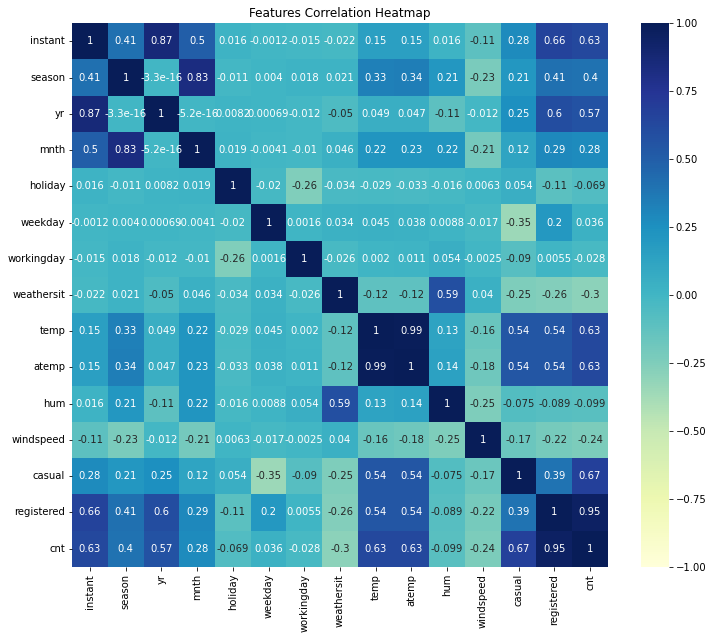

In [8]:
# plotting heat map to see correlation between features
bike_corr = bike.corr()
plt.figure(figsize=(12,10))
sns.heatmap(bike_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Features Correlation Heatmap")
plt.show()

In [9]:
#deleting the instant column as we are not going to use this column in the model building because it is just a record index 
bike.drop(['instant'], axis=1, inplace=True)

In [10]:
#our target variable is 'cnt'. Hence we can drop casual and registered columns.
bike.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
#we have 'yr', 'mnth', 'weekday' columns so we don't need 'dteday' column, hence deleting this column
bike.drop(['dteday'], axis=1, inplace=True)

In [12]:
#temp and atemp is almost similar and highly correlated, hence we will drop atemp
bike.drop(['atemp'], axis=1, inplace=True)

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


**Now we know that 'season', 'mnth', 'weekday', 'weathersit' are suppose to be categorial values. Hence converting them to the corresponding meaningful values.**

In [14]:
#checking the unique values of the 'season' column
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
#changing the mapping of season as - 1:spring, 2:summer, 3:fall, and 4:winter
bike.season = bike.season.map({1:'spring',  2:'summer', 3:'fall', 4:'winter'})

In [16]:
#checking the unique values of the 'mnth' column
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [17]:
#changing the mapping of month as - 1:January, 2:February, 3:March........, and 12:December
bike.mnth = bike.mnth.map({1:'January',  2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 
                           9:'September', 10:'October', 11:'November', 12:'December'})

In [18]:
#checking the unique values of the 'weekday' column
bike.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [19]:
#changing the mapping of weekday as - 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, and 6:Saturday
bike.weekday = bike.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [20]:
#checking the unique values of the 'weathersit' column
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
#changing the mapping of weathersit as - 1:Clear, 2:MistCloud, 3:LightSnowAndRain, 4:HeavyRain
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'MistCloud', 3:'LightSnowAndRain', 4:'HeavyRain'})

In [22]:
#validate the top 5 rows of data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,MistCloud,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,MistCloud,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Outlier Treatment

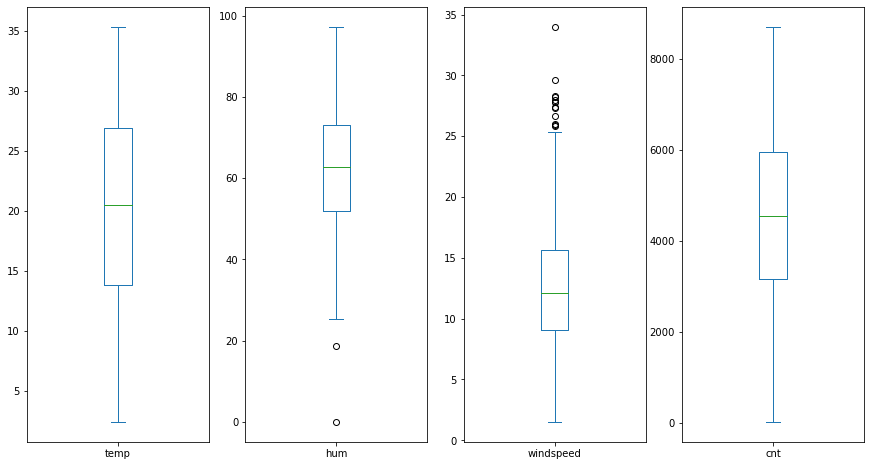

In [23]:
#checking the outliers
plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
bike.temp.plot(kind="box")
plt.subplot(1,4,2)
bike.hum.plot(kind="box")
plt.subplot(1,4,3)
bike.windspeed.plot(kind="box")
plt.subplot(1,4,4)
bike.cnt.plot(kind="box")
plt.show()

**As we can clearly see the outliers in windspeed column, let's handle the outliers.**

In [24]:
#checking the mean, median and quartile data of windspeed column
bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [25]:
#Getting lower bound and upper bound using IQR approach.
#IQR = Interquartile Range (q3-q1)
q1=bike.windspeed.describe()["25%"]
q3=bike.windspeed.describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [26]:
#Treatment of outliers

#Capping
bike.windspeed=np.where(bike.windspeed>upper_bound,upper_bound,bike.windspeed)
#Flooring
bike.windspeed=np.where(bike.windspeed<lower_bound,lower_bound,bike.windspeed)

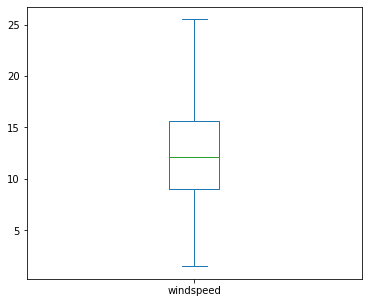

In [27]:
#outliers have been handeled successfully
bike.windspeed.plot(kind="box", figsize=(6,5))
plt.show()

### Visualizing the data

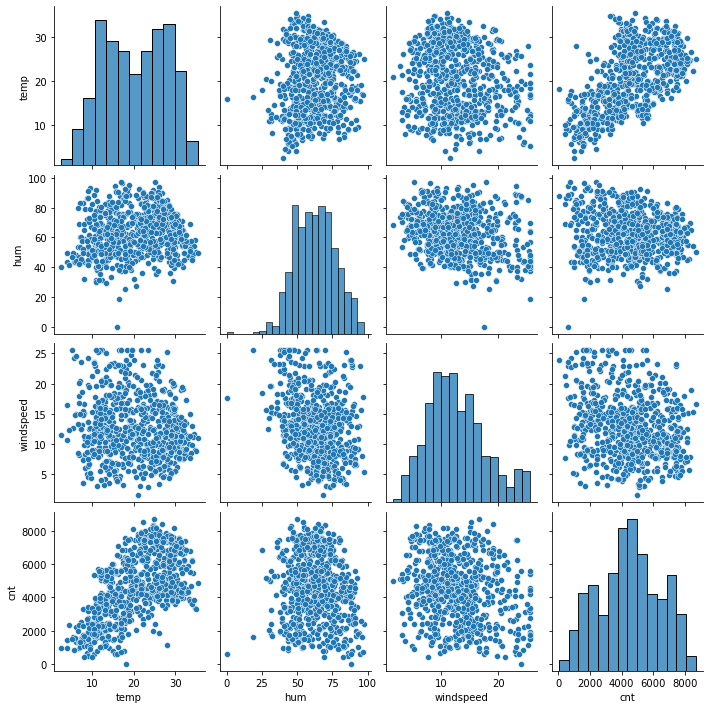

In [28]:
#visualizing the continuous data/numeric data
sns.pairplot(bike, vars=['temp', 'hum', 'windspeed', 'cnt'])
plt.show()

**Inference:** It can be noticed from the above plots that we have linear relation between temp and cnt. hum is also showing small linear relation with cnt.

**Let's again check the correlation with the help of heatmap.**

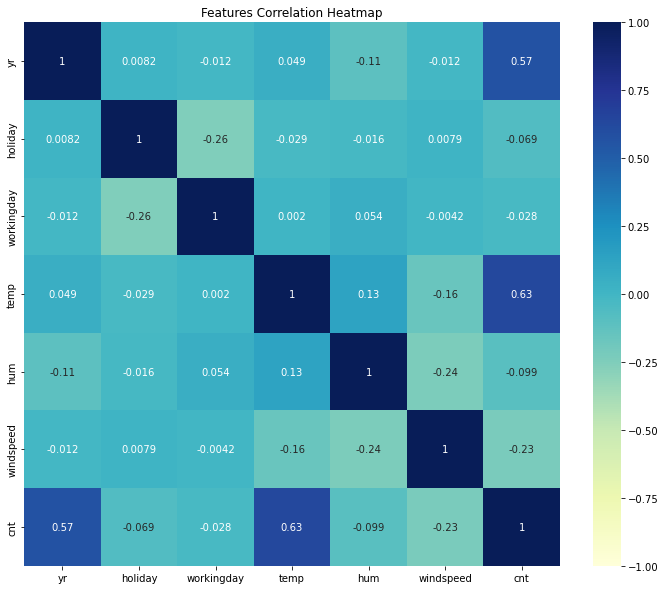

In [29]:
# plotting heat map to see correlation between features
bike_corr = bike.corr()
plt.figure(figsize=(12,10))
sns.heatmap(bike_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Features Correlation Heatmap")
plt.show()

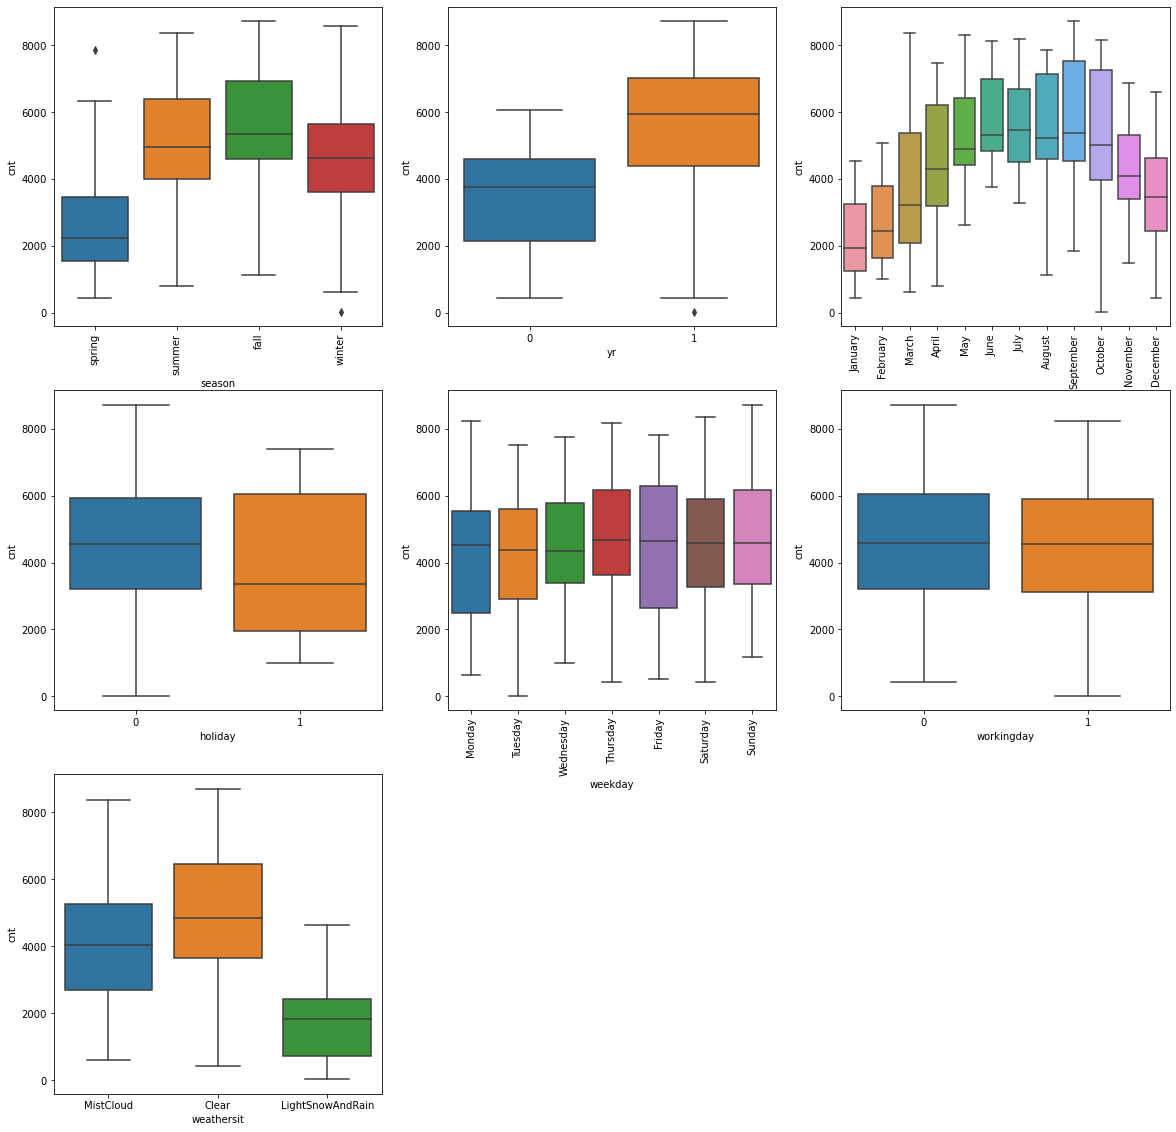

In [30]:
#visualizing the categorial data
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

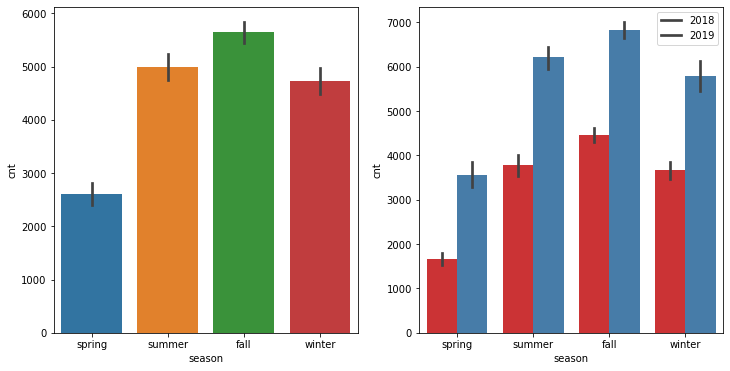

In [31]:
#distribution of demand based on season in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.season,'cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(bike.season,'cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:** From the above plots, it is clear that demand is more for fall and it is increasing in 2019.

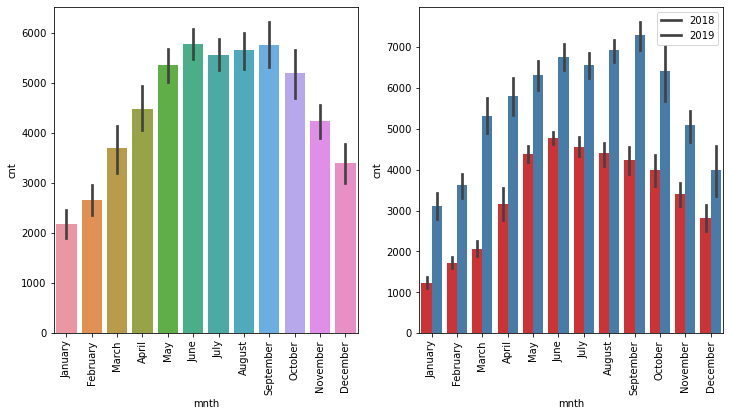

In [32]:
#distribution of demand based on month in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.mnth,'cnt',data=bike)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(bike.mnth,'cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.xticks(rotation=90)
plt.show()

**Inference:** Demand is high between May and September.The lowest demand is in January then it starts increasing gradually. Demand has increased drastically from 2018 to 2019. 

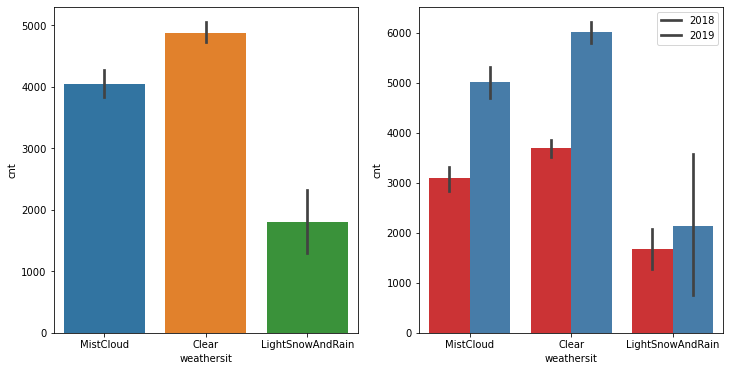

In [33]:
#distribution of demand based on weather in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.weathersit,'cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(bike.weathersit,'cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:** It is clear from the plots that the demand is high in clear weather while lowest in light or snow or rain. Again the demand has been increased in 2019.

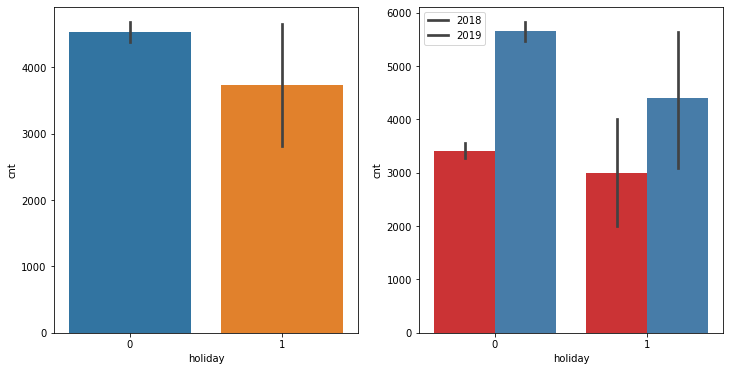

In [34]:
#distribution of demand based on holidays in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.holiday,'cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(bike.holiday,'cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:** The demand is low on holidays as compared to non-holiday day. 2019 shows high demand as compared to 2018.

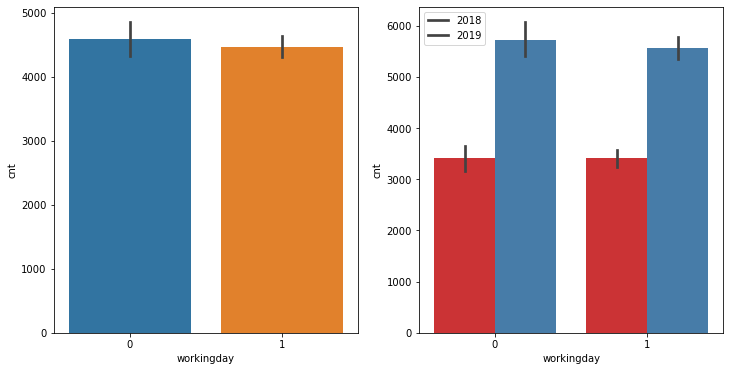

In [35]:
#distribution of demand based on working days in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.workingday,'cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(bike.workingday,'cnt',data=bike, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:** There is no much difference in the demand based on working or non-working day but has been increased 2019. 

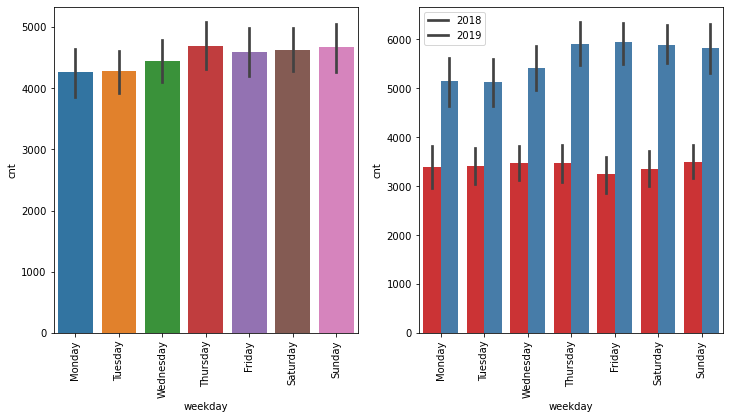

In [36]:
#distribution of demand based on weekdays in 2018 and 2019
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(bike.weekday,'cnt',data=bike)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(bike.weekday,'cnt',data=bike, hue='yr',palette='Set1')
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:** There is no massive differnce in the demand based on the weekday but it is lowest at the start of the week.

## Step 2: Preparing the data for modelling / Data Preparation
- Encoding:
    - Converting binary variables to 1/0
    - Other categorial variables to dummy variables
- Splitting into train and test
- Rescaling of variables

In [37]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,MistCloud,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,MistCloud,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


**We don't have any binary variables with 'Yes' and 'No', so the first step can be ignored.**

### Dummy Variables

In [38]:
#creating dummy variables for season and dropping a redundant dummy variable
seasons = pd.get_dummies(bike.season, drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
#creating dummy variables for mnth and dropping a redundant dummy variable
month = pd.get_dummies(bike.mnth, drop_first=True)
month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [40]:
#creating dummy variables for mnth and dropping a redundant dummy variable
weekdays = pd.get_dummies(bike.weekday, drop_first=True)
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [41]:
#creating dummy variables for mnth and dropping a redundant dummy variable
weather = pd.get_dummies(bike.weathersit, drop_first=True)
weather.head()

,LightSnowAndRain,MistCloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [42]:
#concatinate the dummy variables with original dataset
bike = pd.concat([bike, seasons], axis=1)
bike = pd.concat([bike, month], axis=1)
bike = pd.concat([bike, weekdays], axis=1)
bike = pd.concat([bike, weather], axis=1)

In [43]:
#dropping the old categorial variables
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [44]:
#display the top 5 rows of dataset
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnowAndRain,MistCloud
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting into train and test

In [45]:
#importing the required library for spliting the test and train data
import sklearn
from sklearn.model_selection import train_test_split

In [46]:
#splitting the data into train and test
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [47]:
#display the top 5 rows of train dataset
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnowAndRain,MistCloud
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
#display the top 5 rows of test dataset
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnowAndRain,MistCloud
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Rescaling of variables

**Here, we will be using min-max scaling(normalisation) which will scale the data between 0 and 1.**

In [49]:
#import the library for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [50]:
#instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables which needs to be scaled
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [51]:
#scale the data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [52]:
#validating the data to make sure scaling worked correctly
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnowAndRain,MistCloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.438893,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.226881,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.273856,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.408027,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.569834,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the model
- Manual Feature Selection Process
- RFE(Recursive Feature Elimination)

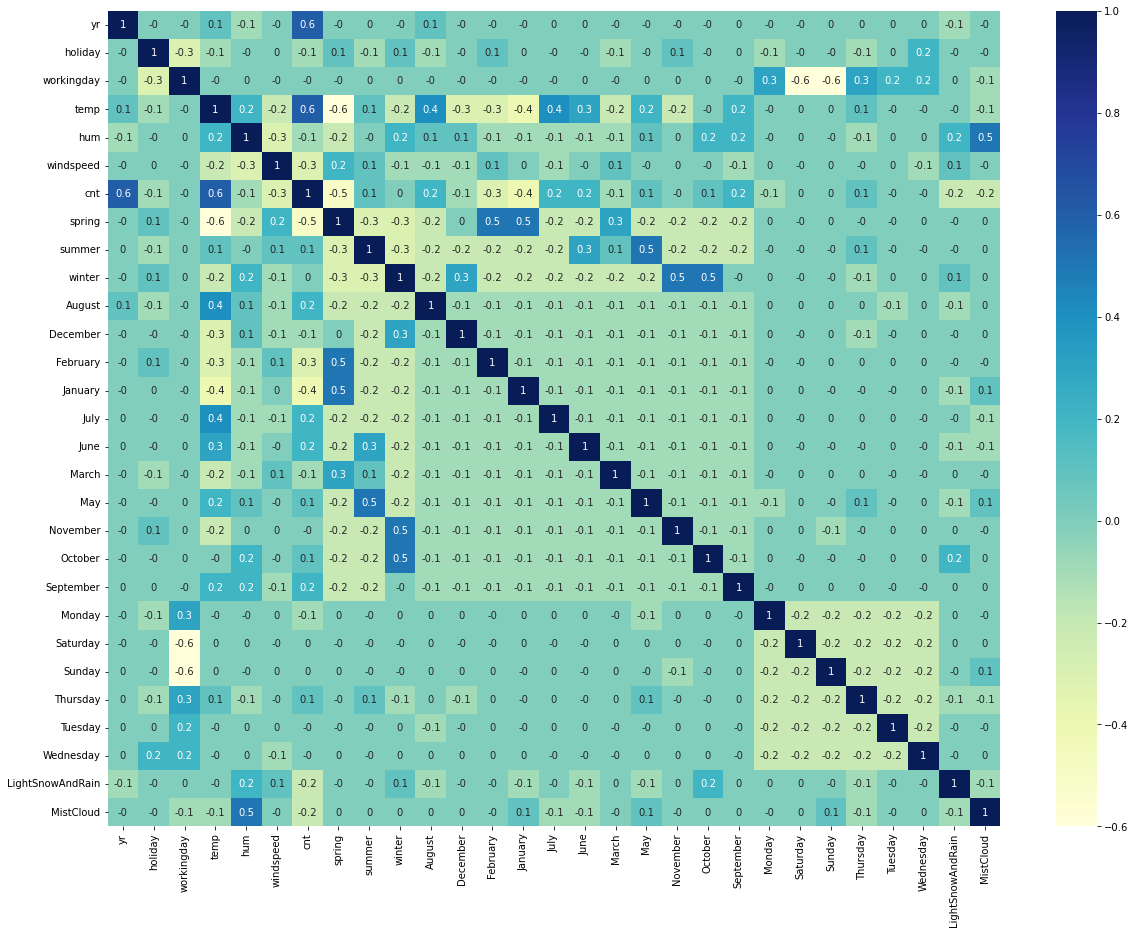

In [53]:
#heatmap to see the correlation between the attibutes
plt.figure(figsize=(20, 15))
sns.heatmap(round(bike_train.corr(), 1), annot = True, cmap="YlGnBu")
plt.show()

### Manual Feature Selection Process
- First we are going to build the model using forward feature selction where we will keep on adding the features and check:
    - Statistical significance of the variable
    - VIF
    - R square value
    
### Manual: Model 1

In [54]:
#getting X_train and y_train from the bike_train dataset
y_train = bike_train.pop('cnt')
X_train = bike_train

In [55]:
#importing the statsmodel library
import statsmodels.api as sm

In [56]:
#add a constant
X_train_sm = sm.add_constant(X_train['temp'])

# Create a model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [57]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.46e-61
Time:                        02:06:52   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Manual: Model 2

In [58]:
#add another variable 'yr'
X_train_sm = X_train[['temp', 'yr']]

#add a constant
X_train_sm = sm.add_constant(X_train_sm)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [59]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.34e-130
Time:                        02:06:52   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Manual: Model 3

In [60]:
#add another variable 'spring'
X_train_sm = X_train[['temp', 'yr', 'spring']]

#add a constant
X_train_sm = sm.add_constant(X_train_sm)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const     0.201605
temp      0.418072
yr        0.240374
spring   -0.143401
dtype: float64

In [61]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     477.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.81e-147
Time:                        02:06:53   Log-Likelihood:                 381.47
No. Observations:                 510   AIC:                            -754.9
Df Residuals:                     506   BIC:                            -738.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2016      0.019     10.769      0.000       0.165       0.238
temp           0.4181      0.029     14.646      0.000       0.362       0.474
yr             0.2404      0.010     23.448      0.000       0.220       0.261
spring        -0.1434      0.015     -9.601      0.000      -0.173      -0.114
==============================================================================
Omnibus:                      103.017   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.850
Skew:                          -0.985   Prob(JB):                     1.70e-61
Kurtosis:                       6.047   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Manual: Model 4

In [62]:
#add another variable 'January'
X_train_sm = X_train[['temp', 'yr', 'spring', 'January']]

#add a constant
X_train_sm = sm.add_constant(X_train_sm)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const      0.206853
temp       0.409092
yr         0.240903
spring    -0.132134
January   -0.038880
dtype: float64

In [63]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     360.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.85e-146
Time:                        02:06:53   Log-Likelihood:                 383.07
No. Observations:                 510   AIC:                            -756.1
Df Residuals:                     505   BIC:                            -735.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2069      0.019     10.939      0.000       0.170       0.244
temp           0.4091      0.029     14.144      0.000       0.352       0.466
yr             0.2409      0.010     23.541      0.000       0.221       0.261
spring        -0.1321      0.016     -8.165      0.000      -0.164      -0.100
January       -0.0389      0.022     -1.787      0.075      -0.082       0.004
==============================================================================
Omnibus:                      106.858   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.732
Skew:                          -1.014   Prob(JB):                     6.06e-65
Kurtosis:                       6.131   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we can see that after adding January, there is no much change in the R square value. We can continue to add the variables one by one and compare the R square value, validate the significance (p-value) and VIF, but this will be very tedious job. Here we have 30 attributes so this manual process will consume significant amount of effort. 
#### To mitigate this issue, we will move towards the automated process and use RFE (Recursive Feature Elimination) method.
#### We will consider 20 attributes using RFE method, compare the significance of attribute, VIF and remove the attributes one by one to get the better model.



### RFE(Recursive Feature Elimination)

In [64]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

#selected top 20 ranked attributes
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 6),
 ('March', False, 9),
 ('May', False, 3),
 ('November', True, 1),
 ('October', False, 8),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', True, 1),
 ('Wednesday', False, 5),
 ('LightSnowAndRain', True, 1),
 ('MistCloud', True, 1)]

In [67]:
#check the top 20 columns with rank 1 selected in RFE
colm = X_train.columns[rfe.support_]
colm

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'December', 'February', 'January', 'July',
       'November', 'September', 'Saturday', 'Sunday', 'Tuesday',
       'LightSnowAndRain', 'MistCloud'],
      dtype='object')

In [68]:
#check the columns which are not selected in RFE
X_train.columns[~rfe.support_]

Index(['August', 'June', 'March', 'May', 'October', 'Monday', 'Thursday',
       'Wednesday'],
      dtype='object')

#### Building the model using statsmodel for the detailed statistics

### RFE: Model 1

In [69]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[colm]

In [70]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

In [72]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.71e-185
Time:                        02:06:54   Log-Likelihood:                 518.72
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     489   BIC:                            -906.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3810      0.081      4.716      0.000       0.222       0.540
yr                   0.2309      0.008     28.568      0.000       0.215       0.247
holiday             -0.1327      0.065     -2.027      0.043      -0.261      -0.004
workingday          -0.0555      0.071     -0.784      0.433      -0.195       0.084
temp                 0.4604      0.038     12.062      0.000       0.385       0.535
hum                 -0.1482      0.038     -3.918      0.000      -0.223      -0.074
windspeed           -0.1377      0.019     -7.144      0.000      -0.176      -0.100
spring              -0.0528      0.022     -2.398      0.017      -0.096      -0.010
summer               0.0399      0.015      2.585      0.010       0.010       0.070
winter               0.1011      0.018      5.615      0.000       0.066       0.136
December            -0.0473      0.018     -2.576      0.010      -0.083      -0.011
February            -0.0366      0.022     -1.690      0.092      -0.079       0.006
January             -0.0630      0.021     -2.933      0.004      -0.105      -0.021
July                -0.0522      0.018     -2.864      0.004      -0.088      -0.016
November            -0.0416      0.019     -2.175      0.030      -0.079      -0.004
September            0.0734      0.017      4.352      0.000       0.040       0.107
Saturday            -0.0430      0.071     -0.609      0.543      -0.182       0.096
Sunday              -0.0369      0.071     -0.523      0.601      -0.175       0.102
Tuesday             -0.0183      0.011     -1.597      0.111      -0.041       0.004
LightSnowAndRain    -0.2531      0.026     -9.564      0.000      -0.305      -0.201
MistCloud           -0.0577      0.010     -5.505      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.566   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.061
Skew:                          -0.805   Prob(JB):                     6.52e-41
Kurtosis:                       5.473   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating the VIF

In [73]:
#importing the library to get the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,416.79
3,workingday,65.68
17,Sunday,37.64
16,Saturday,35.92
2,holiday,6.80
7,spring,5.69
4,temp,4.74
9,winter,3.85
8,summer,2.82
12,January,2.37


**We can clearly see the p-value and VIF is really high for 'workingday', hence we will drop that attribute then build the model again.**

In [74]:
#dropping atemp attribute
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

### RFE: Model 2

In [75]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.15e-186
Time:                        02:06:55   Log-Likelihood:                 518.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     490   BIC:                            -912.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3246      0.037      8.794      0.000       0.252       0.397
yr                   0.2313      0.008     28.689      0.000       0.215       0.247
holiday             -0.0854      0.026     -3.340      0.001      -0.136      -0.035
temp                 0.4610      0.038     12.083      0.000       0.386       0.536
hum                 -0.1473      0.038     -3.898      0.000      -0.222      -0.073
windspeed           -0.1381      0.019     -7.170      0.000      -0.176      -0.100
spring              -0.0523      0.022     -2.379      0.018      -0.096      -0.009
summer               0.0400      0.015      2.596      0.010       0.010       0.070
winter               0.1011      0.018      5.617      0.000       0.066       0.136
December            -0.0470      0.018     -2.561      0.011      -0.083      -0.011
February            -0.0363      0.022     -1.674      0.095      -0.079       0.006
January             -0.0628      0.021     -2.924      0.004      -0.105      -0.021
July                -0.0523      0.018     -2.866      0.004      -0.088      -0.016
November            -0.0432      0.019     -2.275      0.023      -0.081      -0.006
September            0.0737      0.017      4.375      0.000       0.041       0.107
Saturday             0.0116      0.012      0.948      0.344      -0.012       0.036
Sunday               0.0176      0.012      1.472      0.142      -0.006       0.041
Tuesday             -0.0182      0.011     -1.588      0.113      -0.041       0.004
LightSnowAndRain    -0.2529      0.026     -9.561      0.000      -0.305      -0.201
MistCloud           -0.0576      0.010     -5.493      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.258   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.644
Skew:                          -0.807   Prob(JB):                     3.60e-40
Kurtosis:                       5.438   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no drop in R square or Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [76]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,87.07
6,spring,5.69
3,temp,4.74
8,winter,3.85
7,summer,2.82
11,January,2.37
4,hum,1.94
10,February,1.86
13,November,1.82
9,December,1.66


**Now we can see that the significance value of Saturday is really low and has very high VIF. Hence we will drop this attribute.**

In [77]:
#dropping Sunday attribute
X_train_rfe = X_train_rfe.drop(['Saturday'], axis=1)

### RFE: Model 3

In [78]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.19e-187
Time:                        02:06:55   Log-Likelihood:                 517.93
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     491   BIC:                            -917.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3267      0.037      8.869      0.000       0.254       0.399
yr                   0.2312      0.008     28.680      0.000       0.215       0.247
holiday             -0.0859      0.026     -3.362      0.001      -0.136      -0.036
temp                 0.4623      0.038     12.127      0.000       0.387       0.537
hum                 -0.1488      0.038     -3.943      0.000      -0.223      -0.075
windspeed           -0.1383      0.019     -7.184      0.000      -0.176      -0.101
spring              -0.0517      0.022     -2.351      0.019      -0.095      -0.008
summer               0.0401      0.015      2.602      0.010       0.010       0.070
winter               0.1012      0.018      5.621      0.000       0.066       0.137
December            -0.0468      0.018     -2.552      0.011      -0.083      -0.011
February            -0.0368      0.022     -1.701      0.090      -0.079       0.006
January             -0.0629      0.021     -2.928      0.004      -0.105      -0.021
July                -0.0522      0.018     -2.864      0.004      -0.088      -0.016
November            -0.0428      0.019     -2.256      0.024      -0.080      -0.006
September            0.0740      0.017      4.390      0.000       0.041       0.107
Sunday               0.0155      0.012      1.316      0.189      -0.008       0.039
Tuesday             -0.0203      0.011     -1.798      0.073      -0.042       0.002
LightSnowAndRain    -0.2517      0.026     -9.529      0.000      -0.304      -0.200
MistCloud           -0.0570      0.010     -5.445      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       77.841   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.442
Skew:                          -0.800   Prob(JB):                     2.42e-40
Kurtosis:                       5.455   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no drop in R square or Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [79]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.75
6,spring,5.68
3,temp,4.73
8,winter,3.85
7,summer,2.82
11,January,2.37
4,hum,1.93
10,February,1.86
13,November,1.82
9,December,1.66


**Now we can see that the probability of Sunday is really higher that 0.05 . Hence we will drop this attribute.**

In [80]:
#dropping Saturday attribute
X_train_rfe = X_train_rfe.drop(['Sunday'], axis=1)

### RFE: Model 4

In [81]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.55e-188
Time:                        02:06:56   Log-Likelihood:                 517.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     492   BIC:                            -921.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3301      0.037      8.977      0.000       0.258       0.402
yr                   0.2314      0.008     28.683      0.000       0.216       0.247
holiday             -0.0864      0.026     -3.378      0.001      -0.137      -0.036
temp                 0.4622      0.038     12.115      0.000       0.387       0.537
hum                 -0.1511      0.038     -4.005      0.000      -0.225      -0.077
windspeed           -0.1377      0.019     -7.146      0.000      -0.176      -0.100
spring              -0.0519      0.022     -2.359      0.019      -0.095      -0.009
summer               0.0397      0.015      2.578      0.010       0.009       0.070
winter               0.1012      0.018      5.616      0.000       0.066       0.137
December            -0.0460      0.018     -2.509      0.012      -0.082      -0.010
February            -0.0367      0.022     -1.694      0.091      -0.079       0.006
January             -0.0631      0.021     -2.935      0.003      -0.105      -0.021
July                -0.0513      0.018     -2.814      0.005      -0.087      -0.015
November            -0.0438      0.019     -2.309      0.021      -0.081      -0.007
September            0.0742      0.017      4.401      0.000       0.041       0.107
Tuesday             -0.0228      0.011     -2.047      0.041      -0.045      -0.001
LightSnowAndRain    -0.2523      0.026     -9.544      0.000      -0.304      -0.200
MistCloud           -0.0558      0.010     -5.351      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       73.471   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.629
Skew:                          -0.753   Prob(JB):                     1.20e-38
Kurtosis:                       5.439   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no drop in R square or Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [82]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.33
6,spring,5.68
3,temp,4.73
8,winter,3.85
7,summer,2.82
11,January,2.37
4,hum,1.93
10,February,1.86
13,November,1.81
9,December,1.66


**Now we can see that the probability of February is higher that 0.05 . Hence we will drop this attribute.**

In [83]:
#dropping February attribute
X_train_rfe = X_train_rfe.drop(['February'], axis=1)

### RFE: Model 5

In [84]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.00e-188
Time:                        02:06:56   Log-Likelihood:                 515.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3178      0.036      8.799      0.000       0.247       0.389
yr                   0.2310      0.008     28.593      0.000       0.215       0.247
holiday             -0.0889      0.026     -3.475      0.001      -0.139      -0.039
temp                 0.4786      0.037     12.944      0.000       0.406       0.551
hum                 -0.1530      0.038     -4.047      0.000      -0.227      -0.079
windspeed           -0.1363      0.019     -7.069      0.000      -0.174      -0.098
spring              -0.0620      0.021     -2.923      0.004      -0.104      -0.020
summer               0.0431      0.015      2.815      0.005       0.013       0.073
winter               0.1030      0.018      5.716      0.000       0.068       0.138
December            -0.0365      0.017     -2.088      0.037      -0.071      -0.002
January             -0.0434      0.018     -2.396      0.017      -0.079      -0.008
July                -0.0523      0.018     -2.864      0.004      -0.088      -0.016
November            -0.0389      0.019     -2.069      0.039      -0.076      -0.002
September            0.0758      0.017      4.493      0.000       0.043       0.109
Tuesday             -0.0231      0.011     -2.071      0.039      -0.045      -0.001
LightSnowAndRain    -0.2510      0.026     -9.481      0.000      -0.303      -0.199
MistCloud           -0.0556      0.010     -5.317      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       68.869   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.590
Skew:                          -0.711   Prob(JB):                     4.94e-36
Kurtosis:                       5.373   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no significance drop in R square and Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [85]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.95
6,spring,5.26
3,temp,4.43
8,winter,3.84
7,summer,2.77
4,hum,1.93
12,November,1.77
10,January,1.68
16,MistCloud,1.57
9,December,1.50


**The VIF of spring is more than 5, hence we will drop this attribute.**

In [86]:
#dropping spring attribute
X_train_rfe = X_train_rfe.drop(['spring'], axis=1)

### RFE: Model 6

In [87]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.50e-187
Time:                        02:06:57   Log-Likelihood:                 511.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2531      0.029      8.803      0.000       0.197       0.310
yr                   0.2296      0.008     28.255      0.000       0.214       0.246
holiday             -0.0924      0.026     -3.587      0.000      -0.143      -0.042
temp                 0.5530      0.027     20.462      0.000       0.500       0.606
hum                 -0.1645      0.038     -4.343      0.000      -0.239      -0.090
windspeed           -0.1421      0.019     -7.349      0.000      -0.180      -0.104
summer               0.0741      0.011      6.658      0.000       0.052       0.096
winter               0.1384      0.013     10.318      0.000       0.112       0.165
December            -0.0305      0.018     -1.742      0.082      -0.065       0.004
January             -0.0472      0.018     -2.592      0.010      -0.083      -0.011
July                -0.0420      0.018     -2.328      0.020      -0.077      -0.007
November            -0.0289      0.019     -1.552      0.121      -0.065       0.008
September            0.0909      0.016      5.614      0.000       0.059       0.123
Tuesday             -0.0238      0.011     -2.122      0.034      -0.046      -0.002
LightSnowAndRain    -0.2449      0.027     -9.210      0.000      -0.297      -0.193
MistCloud           -0.0527      0.010     -5.029      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       60.158   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.951
Skew:                          -0.676   Prob(JB):                     3.30e-27
Kurtosis:                       4.977   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no significance drop in R square and Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes**

In [88]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.77
3,temp,2.33
7,winter,2.10
4,hum,1.91
11,November,1.71
9,January,1.67
15,MistCloud,1.56
8,December,1.48
6,summer,1.44
10,July,1.44


**The probability of November is more than 0.05, hence we will drop this attribute.**

In [89]:
#dropping November attribute
X_train_rfe = X_train_rfe.drop(['November'], axis=1)

### RFE: Model 7

In [90]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.53e-188
Time:                        02:06:57   Log-Likelihood:                 509.93
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2472      0.029      8.662      0.000       0.191       0.303
yr                   0.2296      0.008     28.213      0.000       0.214       0.246
holiday             -0.0969      0.026     -3.782      0.000      -0.147      -0.047
temp                 0.5604      0.027     21.044      0.000       0.508       0.613
hum                 -0.1641      0.038     -4.327      0.000      -0.239      -0.090
windspeed           -0.1422      0.019     -7.347      0.000      -0.180      -0.104
summer               0.0752      0.011      6.762      0.000       0.053       0.097
winter               0.1278      0.012     11.059      0.000       0.105       0.151
December            -0.0201      0.016     -1.239      0.216      -0.052       0.012
January             -0.0431      0.018     -2.390      0.017      -0.079      -0.008
July                -0.0430      0.018     -2.378      0.018      -0.078      -0.007
September            0.0935      0.016      5.802      0.000       0.062       0.125
Tuesday             -0.0234      0.011     -2.087      0.037      -0.046      -0.001
LightSnowAndRain    -0.2423      0.027     -9.116      0.000      -0.295      -0.190
MistCloud           -0.0523      0.010     -4.984      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.025   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.729
Skew:                          -0.653   Prob(JB):                     3.32e-25
Kurtosis:                       4.897   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no significance drop in R square and Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [91]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.87
3,temp,2.26
4,hum,1.91
9,January,1.63
14,MistCloud,1.56
7,winter,1.55
6,summer,1.44
10,July,1.44
8,December,1.26
13,LightSnowAndRain,1.26


**The probability of December is more than 0.05, hence we will drop this attribute.**

In [92]:
#dropping December attribute
X_train_rfe = X_train_rfe.drop(['December'], axis=1)

### RFE: Model 8

In [93]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.21e-189
Time:                        02:06:58   Log-Likelihood:                 509.14
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     496   BIC:                            -931.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2417      0.028      8.568      0.000       0.186       0.297
yr                   0.2295      0.008     28.187      0.000       0.213       0.245
holiday             -0.0958      0.026     -3.741      0.000      -0.146      -0.046
temp                 0.5700      0.025     22.361      0.000       0.520       0.620
hum                 -0.1688      0.038     -4.471      0.000      -0.243      -0.095
windspeed           -0.1405      0.019     -7.272      0.000      -0.178      -0.103
summer               0.0769      0.011      6.957      0.000       0.055       0.099
winter               0.1261      0.011     10.983      0.000       0.104       0.149
January             -0.0379      0.018     -2.161      0.031      -0.072      -0.003
July                -0.0437      0.018     -2.421      0.016      -0.079      -0.008
September            0.0950      0.016      5.903      0.000       0.063       0.127
Tuesday             -0.0230      0.011     -2.046      0.041      -0.045      -0.001
LightSnowAndRain    -0.2393      0.026     -9.036      0.000      -0.291      -0.187
MistCloud           -0.0516      0.010     -4.918      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       55.082   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.478
Skew:                          -0.638   Prob(JB):                     4.59e-24
Kurtosis:                       4.852   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As there is no drop in R square and Adjusted R square hence we have taken the correct decision. We will again check the VIF values of the remaining attributes.**

In [94]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.66
3,temp,2.06
4,hum,1.89
8,January,1.55
13,MistCloud,1.55
7,winter,1.53
9,July,1.44
6,summer,1.42
12,LightSnowAndRain,1.25
5,windspeed,1.20


#### After building 8 models from RFE selection, we can see the p-value of the selected attributes is less than 0.05 and VIF is less than 5. 
#### We can say that Model 8 is our best model till now with R square value of 0.842 and Adjusted R square value of 0.838 which are good numbers.
#### Now we got the good model so we can stop building more models but we would like to build few more models for better interpretability and see if we can get better model than Model 8. We have to make sure that the R suqare value is not going down after adding or removing more attributes. Let's build few more models.

**Let's drop Tuesday column and see how it affects the model.**

In [95]:
#dropping workingday attribute
X_train_rfe = X_train_rfe.drop(['Tuesday'], axis=1)

### RFE: Model 9

In [96]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.75e-189
Time:                        02:06:58   Log-Likelihood:                 506.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     497   BIC:                            -932.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2430      0.028      8.587      0.000       0.187       0.299
yr                   0.2289      0.008     28.044      0.000       0.213       0.245
holiday             -0.0975      0.026     -3.795      0.000      -0.148      -0.047
temp                 0.5717      0.026     22.367      0.000       0.522       0.622
hum                 -0.1751      0.038     -4.637      0.000      -0.249      -0.101
windspeed           -0.1432      0.019     -7.406      0.000      -0.181      -0.105
summer               0.0763      0.011      6.889      0.000       0.055       0.098
winter               0.1251      0.012     10.866      0.000       0.102       0.148
January             -0.0377      0.018     -2.141      0.033      -0.072      -0.003
July                -0.0462      0.018     -2.555      0.011      -0.082      -0.011
September            0.0946      0.016      5.861      0.000       0.063       0.126
LightSnowAndRain    -0.2350      0.026     -8.873      0.000      -0.287      -0.183
MistCloud           -0.0504      0.011     -4.796      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.217   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.543
Skew:                          -0.613   Prob(JB):                     1.21e-23
Kurtosis:                       4.861   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**There is a small drop in R square and Adjusted R square which which can be accepted because it will increase the interpretation of the model. We will again check the VIF values of the remaining attributes.**

In [97]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.63
3,temp,2.06
4,hum,1.88
8,January,1.55
12,MistCloud,1.55
7,winter,1.53
9,July,1.43
6,summer,1.42
11,LightSnowAndRain,1.24
5,windspeed,1.19


**Let's drop January column and see how it affects the model.**

In [98]:
#dropping January attribute
X_train_rfe = X_train_rfe.drop(['January'], axis=1)

### RFE: Model 10

In [99]:
#adding the constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     236.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.70e-189
Time:                        02:06:59   Log-Likelihood:                 504.65
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     498   BIC:                            -934.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2246      0.027      8.300      0.000       0.171       0.278
yr                   0.2280      0.008     27.869      0.000       0.212       0.244
holiday             -0.0984      0.026     -3.816      0.000      -0.149      -0.048
temp                 0.5976      0.023     26.433      0.000       0.553       0.642
hum                 -0.1813      0.038     -4.800      0.000      -0.256      -0.107
windspeed           -0.1394      0.019     -7.214      0.000      -0.177      -0.101
summer               0.0821      0.011      7.617      0.000       0.061       0.103
winter               0.1349      0.011     12.726      0.000       0.114       0.156
July                -0.0472      0.018     -2.603      0.010      -0.083      -0.012
September            0.0964      0.016      5.959      0.000       0.065       0.128
LightSnowAndRain    -0.2319      0.027     -8.738      0.000      -0.284      -0.180
MistCloud           -0.0502      0.011     -4.764      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       51.978   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.907
Skew:                          -0.601   Prob(JB):                     4.51e-23
Kurtosis:                       4.843   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**There is drop in R square and Adjusted R square which indicates that decision of dropping this attribute was not a good idea. We will again check the VIF values of the remaining attributes.**

In [100]:
#checking the VIF again
#create a dataframe that will contain the names of selected feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.06
4,hum,1.86
3,temp,1.60
11,MistCloud,1.55
8,July,1.43
6,summer,1.33
7,winter,1.29
10,LightSnowAndRain,1.24
9,September,1.19
5,windspeed,1.18


#### The above Model 10 gives us the very good R Square and Adjusted R Square which is not much different from our Model 8. In model 10, we have reduced the munber of variables which means we are avoiding the situation of overfitting. 
#### After checking the correlation of Tuesday and January with cnt, we can clearly say that there is no significant correlation between them. Hence we will consider our Model 10 as final model and proceed further.

## Step 4: Residual Analysis

**Now we have our model ready but we need to check the credibility, reliability of the model. To do so, first step is to validate the assumptions that we made before building the model. Let's validate the assumtions one by one.**

### 1. Normal Distribution of Error Terms

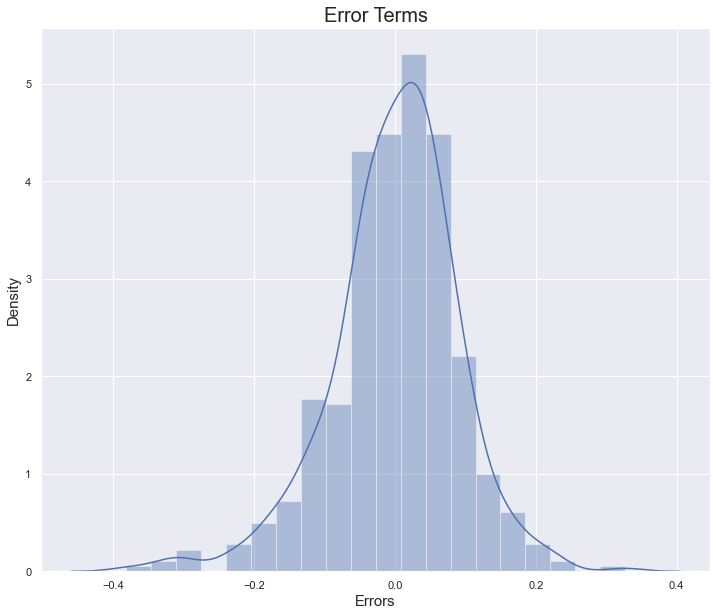

In [101]:
sns.set(rc={'figure.figsize':(12,10)})
y_train_pred = lr_model.predict(X_train_rfe)
residual = y_train - y_train_pred

# Plot the histogram of the error terms
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)        
plt.ylabel('Density', fontsize = 15)
plt.show()

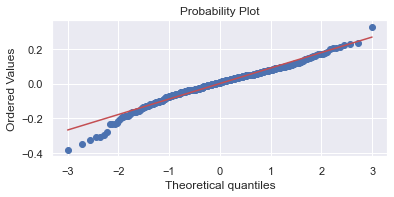

In [102]:
#plotting Q–Q plot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

#### It is clearly visible from the above plot that error terms are normally distributed across 0. Hence our first assumtion is correct.
### 2. Error Terms are Independent (No Pattern)

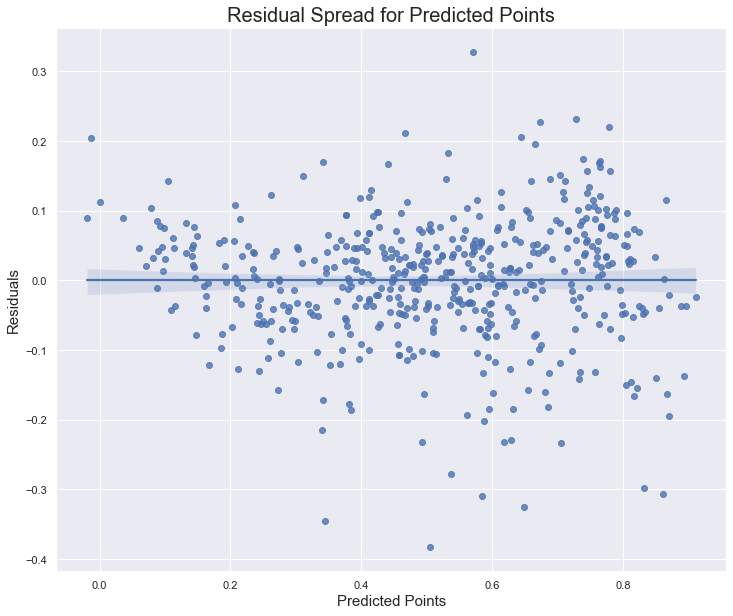

In [103]:
#look for patterns in residuals (we should not be able to identify)
sns.regplot(y_train_pred, residual)
plt.title('Residual Spread for Predicted Points', fontsize = 20)
plt.xlabel('Predicted Points', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.show()

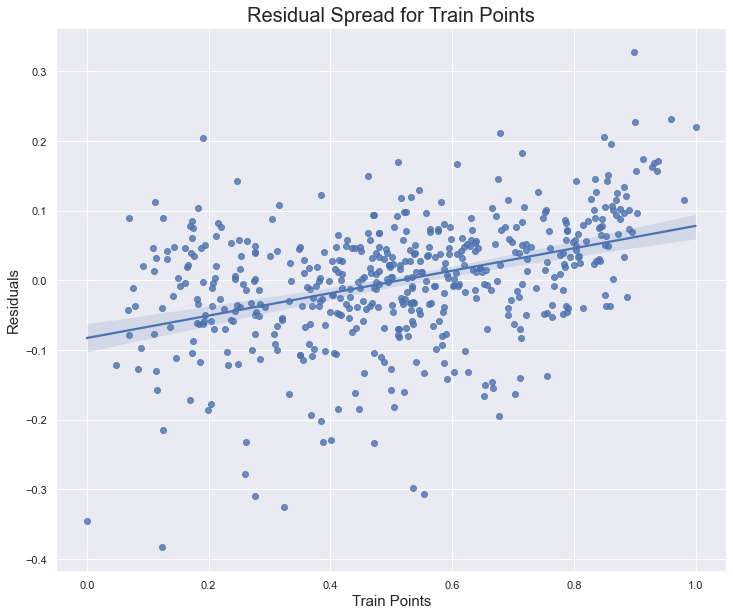

In [104]:
#look for patterns in residuals (we should not be able to identify)
sns.regplot(y_train, residual)
plt.title('Residual Spread for Train Points', fontsize = 20)
plt.xlabel('Train Points', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.show()

#### As there is no pattern identified in the above plot, we can conclude that our assumption was correct.
### 3. Autocorrelation

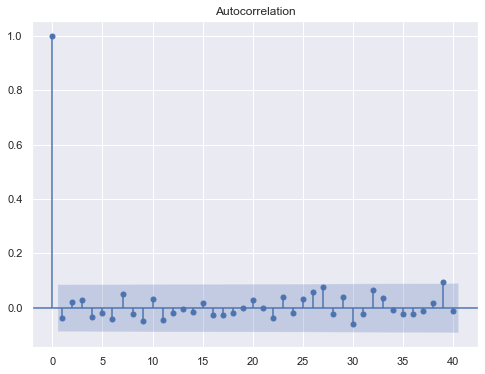

In [105]:
sns.set(rc={'figure.figsize':(8,6)})
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

#### As we can see from the above plot there is no autocorrelation of errors. This means that the error term of one observation is not influenced by the error term of another observation.

## Step 5: Making Predictions Using the Final Model
**Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model, i.e. tenth model.**
#### Applying the scaling on the test sets

In [106]:
#scale the data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [107]:
#validating the data to make sure scaling worked correctly
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnowAndRain,MistCloud
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.429795,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.216662,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.058858,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.273395,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.412652,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.553709,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,1.000000,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [108]:
#getting X_test and y_test from the bike_test dataset
y_test = bike_test.pop('cnt')
X_test = bike_test

In [109]:
# Adding constant variable to test dataframe
X_test_m10 = sm.add_constant(X_test)

In [110]:
#using the attributes from train dataset which were used in the final model
X_test_m10 = X_test_m10[X_train_rfe.columns]

In [111]:
#making prediction using the final model
y_pred = lr_model.predict(X_test_m10)

## Step 6: Model Evaluation on the Test Set
**Let's now plot the graph for actual versus predicted values.**

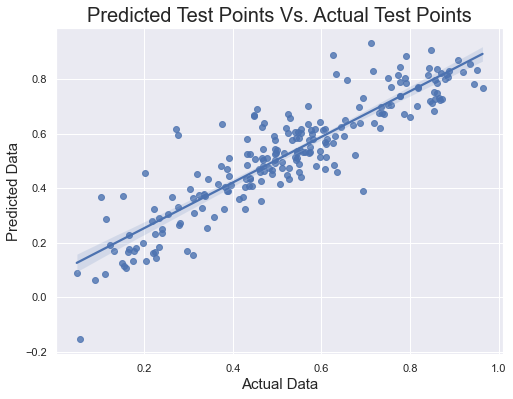

In [112]:
# Plotting y_test and y_pred to understand the spread

sns.regplot(y_test, y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontsize = 20)
plt.xlabel('Actual Data', fontsize = 15)
plt.ylabel('Predicted Data', fontsize = 15)
plt.show()

### We can see from the above plot that Actual and Predicted test points are linear, which concludes this models works fine.
#### Now we will use r2 square and mean square error metrics to evaluate the model.

In [113]:
#importing library for MSE and R square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#getting mean square value
np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
#calculate r square for test data
r2_score(y_test, y_pred)

### r2 score for test data is 0.802 (80.2). The difference between r2 scores of train and test data is less than 5. Hence, we can say that our model is working well.

## Equation for best fitted line:
### cnt = 0.228 * yr - 0.0984 * holiday + 0.5976 * temp - 0.1813 * hum - 0.1394 * windspeed + 0.0821 * summer + 0.1349 * winter - 0.0472 * July + 0.0964 * September - 0.2319 * LightSnowAndRain - 0.0502 * MistCloud + 0.2246

### Summary and Suggestions:

- From the derived R-Squared and Adjusted R-Squared value on both train and test dataset we could conclude that the above variables can definitely explain more than 80% of bike demand.
- Coefficients of the variables explains the factors effecting the bike demand.
- Based on final model top three features contributing significantly towards explaining the demand are:
    - Temperature (0.5976)
    - Weather Situation : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.2319)
    - Year (0.228)
    
**So it is suggested to give more priority on the above 3 attributes as these play the key driver role in demand.**